In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import logging
import os

In [2]:
# Create CSV with data quality checks
data_quality_checks = {
    'Check': ['check_missing_values', 'check_duplicates', 'check_inconsistencies_gender'],
    'Run': ['Yes', 'Yes', 'Yes']
}
checks_df = pd.DataFrame(data_quality_checks)
checks_df.to_csv('data_quality_checks.csv', index=False)

# Load user selection from CSV
user_selection_df = pd.read_csv('data_quality_checks.csv')
user_selection_df.set_index('Check', inplace=True)

# Example data
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'age': [25, 30, None, 22, 28],
    'gender': ['F', 'M', 'M', 'M', 'F'],
    'email': ['alice@example.com', 'bob@example.com', 'charlie@example', 'david@example.com', 'eve@example.com']
}
df = pd.DataFrame(data)


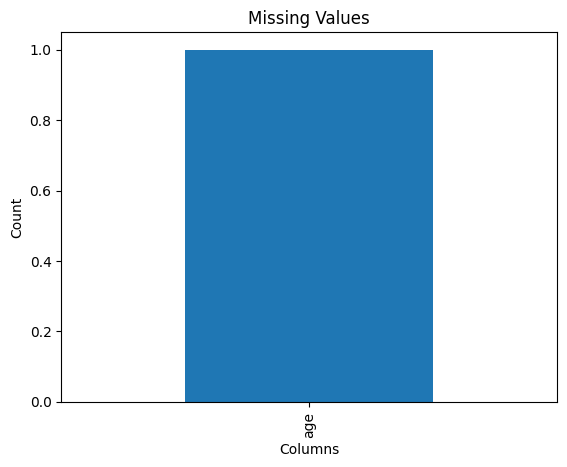

In [3]:
# Data quality check functions
def check_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    """Check for missing values in the DataFrame."""
    missing_values = df.isnull().sum()
    return missing_values[missing_values > 0]

def check_duplicates(df: pd.DataFrame) -> int:
    """Check for duplicate rows in the DataFrame."""
    return df.duplicated().sum()

def check_inconsistencies(df: pd.DataFrame, column: str, valid_values: list) -> pd.Series:
    """Check for inconsistencies in a specific column."""
    return df[~df[column].isin(valid_values)][column]

# Logging configuration
logging.basicConfig(filename='data_quality.log', level=logging.INFO)

def log_data_quality_issue(issue: str):
    """Log a data quality issue."""
    logging.info(issue)

def report_data_quality_issues(df: pd.DataFrame, user_selection_df: pd.DataFrame):
    """Generate a report of data quality issues based on user selection."""
    if user_selection_df.loc['check_missing_values', 'Run'] == 'Yes':
        missing_values = check_missing_values(df)
        if not missing_values.empty:
            log_data_quality_issue(f"Missing Values:\n{missing_values}")
    if user_selection_df.loc['check_duplicates', 'Run'] == 'Yes':
        duplicates = check_duplicates(df)
        if duplicates > 0:
            log_data_quality_issue(f"Duplicate Rows: {duplicates}")
    if user_selection_df.loc['check_inconsistencies_gender', 'Run'] == 'Yes':
        gender_inconsistencies = check_inconsistencies(df, 'gender', ['M', 'F'])
        if not gender_inconsistencies.empty:
            log_data_quality_issue(f"Inconsistencies in 'gender':\n{gender_inconsistencies}")

def visualize_missing_values(df: pd.DataFrame):
    """Visualize missing values in the DataFrame."""
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    if not missing_values.empty:
        missing_values.plot(kind='bar')
        plt.title('Missing Values')
        plt.xlabel('Columns')
        plt.ylabel('Count')
        plt.show()
    else:
        print("No missing values to plot.")

# Report and visualize data quality issues
report_data_quality_issues(df, user_selection_df)
visualize_missing_values(df)


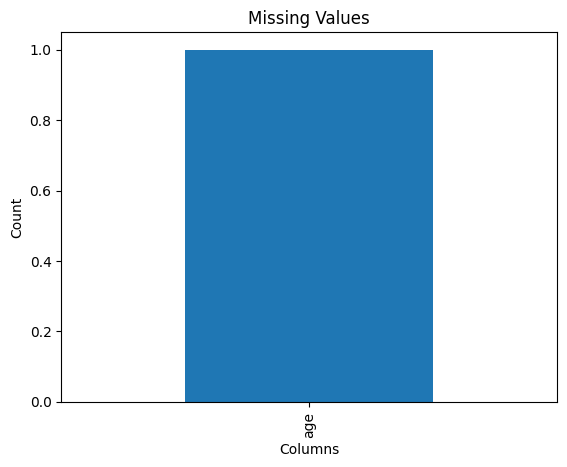

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import logging
import os

# Create CSV with data quality checks
data_quality_checks = {
    'Check': ['check_missing_values', 'check_duplicates', 'check_inconsistencies_gender'],
    'Run': ['Yes', 'Yes', 'Yes']
}
checks_df = pd.DataFrame(data_quality_checks)
checks_df.to_csv('data_quality_checks.csv', index=False)

# Load user selection from CSV
user_selection_df = pd.read_csv('data_quality_checks.csv')
user_selection_df.set_index('Check', inplace=True)

# Example data
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'age': [25, 30, None, 22, 28],
    'gender': ['F', 'M', 'M', 'M', 'F'],
    'email': ['alice@example.com', 'bob@example.com', 'charlie@example', 'david@example.com', 'eve@example.com']
}
df = pd.DataFrame(data)

# File details
file_name = 'example_data.csv'
file_path = os.path.abspath(file_name)

# Data quality check functions
def check_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    """Check for missing values in the DataFrame."""
    missing_values = df.isnull().sum()
    return missing_values[missing_values > 0]

def check_duplicates(df: pd.DataFrame) -> int:
    """Check for duplicate rows in the DataFrame."""
    return df.duplicated().sum()

def check_inconsistencies(df: pd.DataFrame, column: str, valid_values: list) -> pd.Series:
    """Check for inconsistencies in a specific column."""
    return df[~df[column].isin(valid_values)][column]

# Logging configuration
logging.basicConfig(filename='data_quality.log', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def log_data_quality_issue(file_name: str, file_path: str, column_name: str, issue: str):
    """Log a data quality issue."""
    logging.info(f"File: {file_name}, Path: {file_path}, Column: {column_name}, Issue: {issue}")

def report_data_quality_issues(df: pd.DataFrame, user_selection_df: pd.DataFrame, file_name: str, file_path: str):
    """Generate a report of data quality issues based on user selection."""
    if user_selection_df.loc['check_missing_values', 'Run'] == 'Yes':
        missing_values = check_missing_values(df)
        if not missing_values.empty:
            for column, count in missing_values.items():
                log_data_quality_issue(file_name, file_path, column, f"Missing Values: {count}")
    if user_selection_df.loc['check_duplicates', 'Run'] == 'Yes':
        duplicates = check_duplicates(df)
        if duplicates > 0:
            log_data_quality_issue(file_name, file_path, 'All Columns', f"Duplicate Rows: {duplicates}")
    if user_selection_df.loc['check_inconsistencies_gender', 'Run'] == 'Yes':
        gender_inconsistencies = check_inconsistencies(df, 'gender', ['M', 'F'])
        if not gender_inconsistencies.empty:
            for inconsistency in gender_inconsistencies.unique():
                count = (gender_inconsistencies == inconsistency).sum()
                log_data_quality_issue(file_name, file_path, 'gender', f"Inconsistent Value: {inconsistency} (Count: {count})")

def visualize_missing_values(df: pd.DataFrame):
    """Visualize missing values in the DataFrame."""
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    if not missing_values.empty:
        missing_values.plot(kind='bar')
        plt.title('Missing Values')
        plt.xlabel('Columns')
        plt.ylabel('Count')
        plt.show()
    else:
        print("No missing values to plot.")

# Report and visualize data quality issues
report_data_quality_issues(df, user_selection_df, file_name, file_path)
visualize_missing_values(df)
